In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns

In [2]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

df_demo = pd.DataFrame()

df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()

df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])

KMeans Clustering is now performed on a random sample of 10,000 records - with seedings ranging from 2 up to 10 clusters
The best performing (most cohesive) #clusters is reported, based on the average silhouette score over 10 runs

In [3]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

sc = StandardScaler()
X_db = sc.fit_transform(X)

scores = []
best = 0
iterations = 10
for clusters in range(2, 11):
    c_score = 0
    for i in range(iterations):
        km = KMeans(n_clusters = clusters).fit(X_db)
        score = metrics.silhouette_score(X_db, km.labels_)
        scores.append([clusters, score])
        c_score += score
    c_score /= iterations #compute the average score for this number clusters
    if best == 0 or c_score < best:
        best = c_score
        n_clusters = clusters

print("best is ",n_clusters, "clusters - with average silhouette score of ", best)

C:\Users\Fish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


best is  3 clusters - with average silhouette score of  0.220577292814


The confidence interval for each seeding (2 to 10) is now shown.
As can be seen, 3 clusters marginally outperforms 2 - within the variances shown, a superior 2 cluster configuration is possible, but on average 3 clusters is better

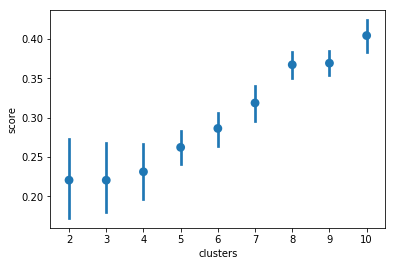

In [4]:
scores_df = pd.DataFrame(scores, columns=["clusters", "score"])
plt.figure()
sns.pointplot(x="clusters", y="score", data=scores_df, join=False)

We will now visualise the 3 clusters using the 3 most principal dimensions.
NOTE I can find no way to suppress inclusion of the 'label' dimension below.
So please ignore the bottom row and last column

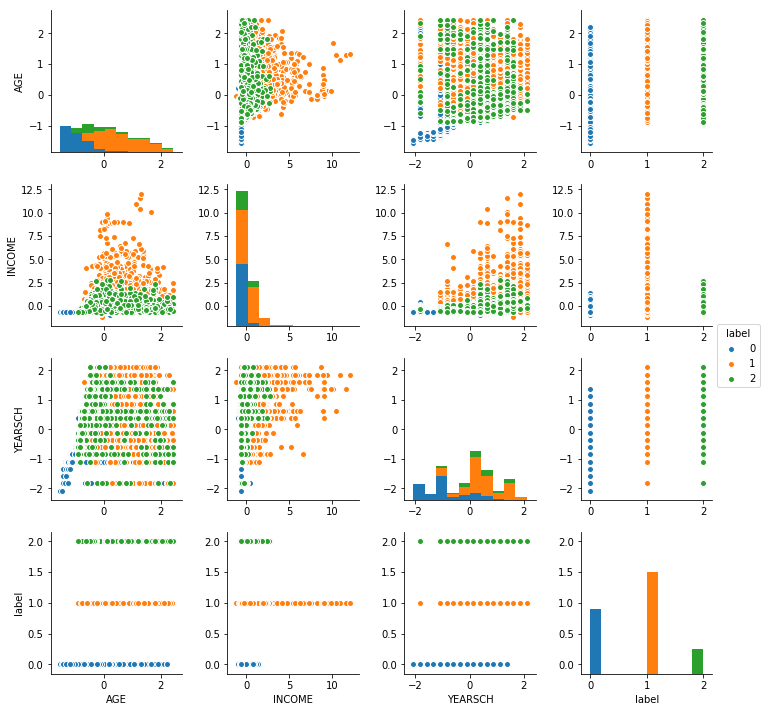

In [5]:
labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)
X_df = pd.DataFrame(X_db[:,:3], columns=['AGE', 'INCOME', 'YEARSCH'])
X_df['label'] = labels

plt.figure()
sns.pairplot(data=X_df, hue='label', dropna=True)

The above analysis is now repeated using Agglomerative clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering

scores = []
best = 0
iterations = 10
for clusters in range(2, 11):
    c_score = 0
    for i in range(iterations):
        km = AgglomerativeClustering(n_clusters = clusters).fit(X_db)
        score = metrics.silhouette_score(X_db, km.labels_)
        scores.append([clusters, score])
        c_score += score
    c_score /= iterations #compute the average score for this number clusters
    if best == 0 or c_score < best:
        best = c_score
        n_clusters = clusters

print("best is ",n_clusters, "clusters - with average silhouette score of ", best)

best is  4 clusters - with average silhouette score of  0.181182446598


With agglomerative clustering, an additional 4th cluster gives the best results (on average over the 10 runs)
As previously, ehe confidence interval for each #clusters (2 to 10) is now shown.
As can be seen, there is NO VARIATION in the resulting clusters - ie. for a given target cluster size, the resulting clusters are always identical. This is because, unlike KMeans, aglommerative clustering does not involve any random seeding.

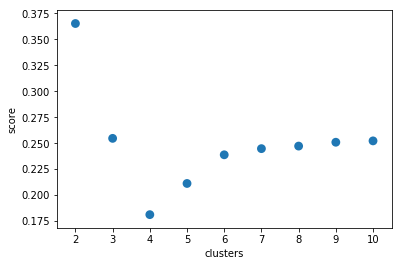

In [7]:
scores_df = pd.DataFrame(scores, columns=["clusters", "score"])
plt.figure()
sns.pointplot(x="clusters", y="score", data=scores_df, join=False)

We will now visualise the 4 clusters using the 3 most principal dimensions.
AGAIN please ignore the bottom row and last column (these are the labels, they are not part of the data-set)

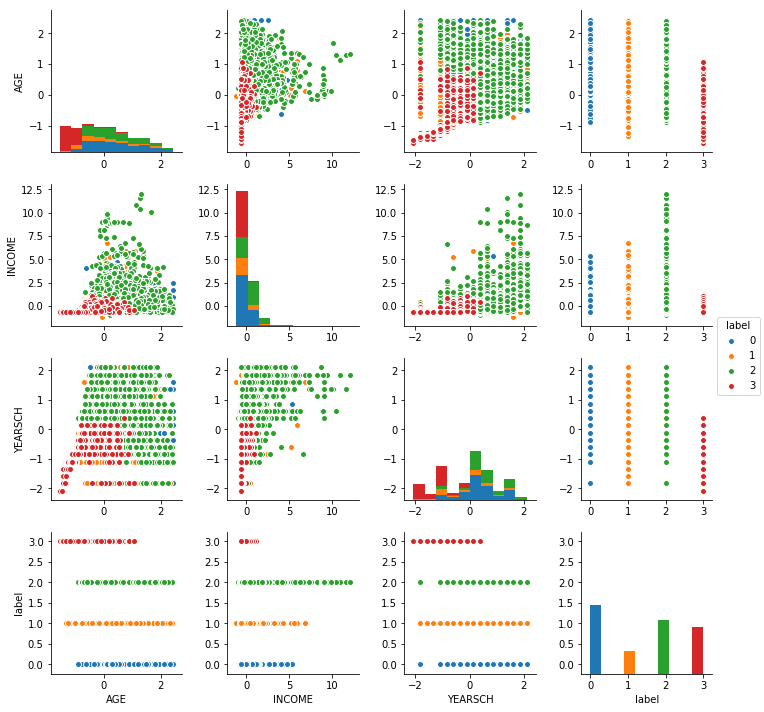

In [8]:
labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)
X_df = pd.DataFrame(X_db[:,:3], columns=['AGE', 'INCOME', 'YEARSCH'])
X_df['label'] = labels

plt.figure()
sns.pairplot(data=X_df, hue='label', dropna=True)